# Predict the critical temperature using Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_csv('train.csv')


In [3]:
dataset.head()
#

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
dataset.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [5]:
dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

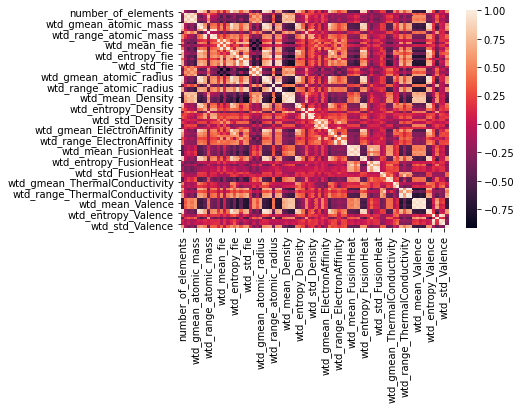

In [6]:
sns.heatmap(dataset.corr())

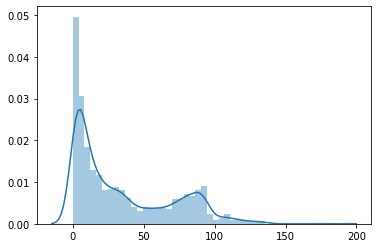

In [7]:
 sns.distplot(dataset.critical_temp.values)

### Splitting the dataset into the Training set and Test set

Feature 0: 8270.247
Feature 1: 200.804
Feature 2: 1535.869
Feature 3: 830.974
Feature 4: 2248.899
Feature 5: 6033.692
Feature 6: 9287.309
Feature 7: 4644.982
Feature 8: 1788.963
Feature 9: 2466.016
Feature 10: 2148.102
Feature 11: 165.685
Feature 12: 2652.741
Feature 13: 5.572
Feature 14: 1876.779
Feature 15: 6911.458
Feature 16: 2678.654
Feature 17: 8097.093
Feature 18: 1334.750
Feature 19: 5929.856
Feature 20: 7276.623
Feature 21: 138.663
Feature 22: 1351.872
Feature 23: 323.351
Feature 24: 2748.663
Feature 25: 6611.153
Feature 26: 8269.777
Feature 27: 10546.784
Feature 28: 1889.016
Feature 29: 6377.008
Feature 30: 7855.111
Feature 31: 2238.688
Feature 32: 3254.896
Feature 33: 5878.567
Feature 34: 5814.165
Feature 35: 3810.654
Feature 36: 2756.663
Feature 37: 1118.730
Feature 38: 1221.404
Feature 39: 225.774
Feature 40: 689.736
Feature 41: 533.649
Feature 42: 173.171
Feature 43: 2419.131
Feature 44: 178.193
Feature 45: 3407.697
Feature 46: 910.226
Feature 47: 1265.654
Feature 48: 469

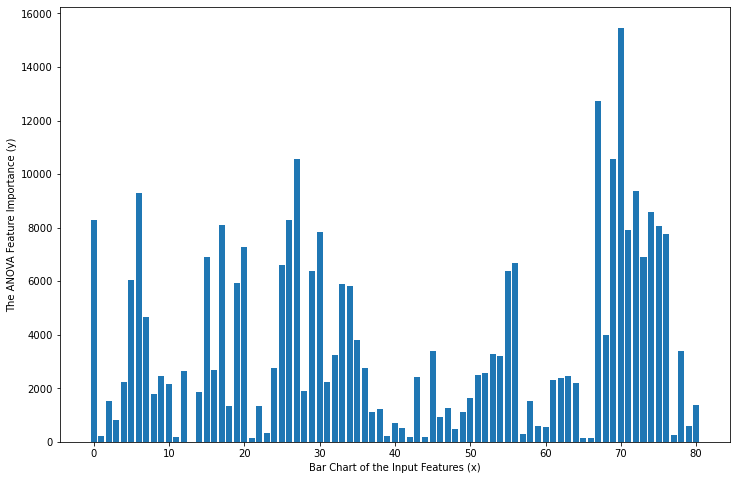

In [8]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# feature selection
def select_features(X_train, y_train, X_test):

# define number of features to evaluate
    num_features = [i+1 for i in range(X.shape[1])]
# enumerate each number of features
    results = list()
    for k in num_features:
        fs = SelectKBest(score_func= f_regression, k= k)
	# learn relationship from training data
        fs.fit(X_train, y_train)
	# transform train input data
        X_train_fs = fs.transform(X_train)
	# transform test input data
        X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs= select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %.3f' % (i, np.mean(fs.scores_[i])) ) 
    
# plot the scores
plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel("Bar Chart of the Input Features (x)")
plt.ylabel("The ANOVA Feature Importance (y)")
plt.show()

In [10]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
import os
import shutil

sc =  MinMaxScaler()
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
cvscores = []
fold_no = 0

for train, test in kfold.split(X_train_fs, y_train):
    X_train_fs[train] = sc.fit_transform(X_train_fs[train])
    X_train_fs[test] = sc.transform(X_train_fs[test])  
    
    #Building the ANN
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=512, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
    ann.add(tf.keras.layers.Dropout(0.5))
    ann.add(tf.keras.layers.Dense(units=1))
 
    ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    # Save the best performing Keras model across all the folds in K-fold cross validation:
    # Define callbacks
    es= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=60)
    #checkpoint_path = f'./{fold_no}'
    #if os.path.exists(checkpoint_path):
     #   shutil.rmtree(checkpoint_path)
    #os.makedirs(checkpoint_path)
    #mc= ModelCheckpoint(checkpoint_path, monitor= 'val_loss', save_best_only= True, mode= 'min')
        
    #Training the ANN model on the Training set
    history= ann.fit(X_train_fs[train], y_train[train], validation_data= (X_train_fs[test], y_train[test]), batch_size= 120, epochs= 300, verbose=1, callbacks=[es])

    # evaluate the model
    test_loss= ann.evaluate(X_train_fs[test], y_train[test], verbose=0)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold: {fold_no} ...')
    print("%s: %.2f%%" % (ann.metrics_names[0], test_loss))
    print("%.2f%% (+/- %.2f%%)" % (np.mean(test_loss), np.std(test_loss)))
    cvscores.append(test_loss)
    # Increase fold number
    fold_no = fold_no + 1
print("mean loss:%.2f%% -standard deviation:(+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/300
95/95 [==============================] - 1s 8ms/step - loss: 909.1039 - val_loss: 424.8598
Epoch 2/300
95/95 [==============================] - 1s 6ms/step - loss: 497.6360 - val_loss: 398.6666
Epoch 3/300
95/95 [==============================] - 0s 5ms/step - loss: 416.5197 - val_loss: 308.7591
Epoch 4/300
95/95 [==============================] - 1s 6ms/step - loss: 407.7310 - val_loss: 268.8575
Epoch 5/300
95/95 [==============================] - 0s 5ms/step - loss: 383.3392 - val_loss: 258.6938
Epoch 6/300
95/95 [==============================] - 1s 5ms/step - loss: 370.6135 - val_loss: 254.6069
Epoch 7/300
95/95 [==============================] - 1s 5ms/step - loss: 365.2588 - val_loss: 253.4371
Epoch 8/300
95/95 [==============================] - 1s 5ms/step - loss: 353.0824 - val_loss: 245.5939
Epoch 9/300
95/95 [==============================] - 0s 5ms/step - loss: 368.3496 - val_loss: 295.6607
Epoch 10/300
95/95 [==============================] - 0s 5ms/step - loss:

Epoch 80/300
95/95 [==============================] - 0s 5ms/step - loss: 298.8854 - val_loss: 212.4059
Epoch 81/300
95/95 [==============================] - 0s 5ms/step - loss: 291.9171 - val_loss: 219.5176
Epoch 82/300
95/95 [==============================] - 0s 5ms/step - loss: 298.3008 - val_loss: 217.0342
Epoch 83/300
95/95 [==============================] - 0s 5ms/step - loss: 294.1089 - val_loss: 203.5967
Epoch 84/300
95/95 [==============================] - 0s 5ms/step - loss: 297.3701 - val_loss: 209.3673
Epoch 85/300
95/95 [==============================] - 0s 5ms/step - loss: 298.7852 - val_loss: 220.5446
Epoch 86/300
95/95 [==============================] - 0s 5ms/step - loss: 293.2354 - val_loss: 210.7798
Epoch 87/300
95/95 [==============================] - 1s 5ms/step - loss: 294.3274 - val_loss: 210.9267
Epoch 88/300
95/95 [==============================] - 0s 5ms/step - loss: 292.2857 - val_loss: 210.7466
Epoch 89/300
95/95 [==============================] - 0s 5ms/ste

95/95 [==============================] - 0s 5ms/step - loss: 278.6873 - val_loss: 219.4781
Epoch 159/300
95/95 [==============================] - 1s 6ms/step - loss: 271.2829 - val_loss: 209.1880
Epoch 160/300
95/95 [==============================] - 1s 6ms/step - loss: 276.9100 - val_loss: 215.7351
Epoch 161/300
95/95 [==============================] - 1s 5ms/step - loss: 276.8805 - val_loss: 236.9547
Epoch 162/300
95/95 [==============================] - 0s 5ms/step - loss: 278.6967 - val_loss: 213.6829
Epoch 163/300
95/95 [==============================] - 1s 6ms/step - loss: 281.1676 - val_loss: 205.0752
Epoch 164/300
95/95 [==============================] - 0s 5ms/step - loss: 272.8279 - val_loss: 217.7843
Epoch 165/300
95/95 [==============================] - 0s 5ms/step - loss: 270.0708 - val_loss: 195.8849
Epoch 166/300
95/95 [==============================] - 1s 6ms/step - loss: 272.3219 - val_loss: 208.1846
Epoch 167/300
95/95 [==============================] - 1s 6ms/step - 

95/95 [==============================] - 1s 7ms/step - loss: 261.1969 - val_loss: 194.8790
Epoch 237/300
95/95 [==============================] - 1s 7ms/step - loss: 273.8903 - val_loss: 203.9739
Epoch 238/300
95/95 [==============================] - 1s 6ms/step - loss: 262.0909 - val_loss: 210.3470
Epoch 239/300
95/95 [==============================] - 1s 7ms/step - loss: 265.7139 - val_loss: 226.7986
Epoch 240/300
95/95 [==============================] - 1s 6ms/step - loss: 272.4338 - val_loss: 214.6225
Epoch 241/300
95/95 [==============================] - 1s 6ms/step - loss: 279.4906 - val_loss: 216.0105
Epoch 242/300
95/95 [==============================] - 1s 7ms/step - loss: 265.0779 - val_loss: 198.7758
Epoch 243/300
95/95 [==============================] - 1s 7ms/step - loss: 269.0896 - val_loss: 216.7132
Epoch 244/300
95/95 [==============================] - 1s 7ms/step - loss: 257.4926 - val_loss: 198.0170
Epoch 245/300
95/95 [==============================] - 1s 7ms/step - 

95/95 [==============================] - 1s 6ms/step - loss: 311.4282 - val_loss: 227.2454
Epoch 60/300
95/95 [==============================] - 1s 7ms/step - loss: 316.8642 - val_loss: 231.4480
Epoch 61/300
95/95 [==============================] - 1s 7ms/step - loss: 304.2424 - val_loss: 226.7224
Epoch 62/300
95/95 [==============================] - 1s 7ms/step - loss: 300.3286 - val_loss: 237.5798
Epoch 63/300
95/95 [==============================] - 1s 7ms/step - loss: 309.1590 - val_loss: 246.1597
Epoch 64/300
95/95 [==============================] - 1s 7ms/step - loss: 306.9851 - val_loss: 232.4733
Epoch 65/300
95/95 [==============================] - 1s 7ms/step - loss: 297.4522 - val_loss: 238.5457
Epoch 66/300
95/95 [==============================] - 1s 7ms/step - loss: 308.5938 - val_loss: 234.2089
Epoch 67/300
95/95 [==============================] - 1s 6ms/step - loss: 301.0469 - val_loss: 228.9772
Epoch 68/300
95/95 [==============================] - 1s 7ms/step - loss: 306

95/95 [==============================] - 1s 6ms/step - loss: 273.6931 - val_loss: 230.0423
Epoch 138/300
95/95 [==============================] - 1s 6ms/step - loss: 275.6954 - val_loss: 222.6726
Epoch 139/300
95/95 [==============================] - 1s 6ms/step - loss: 270.1939 - val_loss: 227.1982
Epoch 140/300
95/95 [==============================] - 1s 6ms/step - loss: 273.9077 - val_loss: 225.2840
Epoch 141/300
95/95 [==============================] - 1s 6ms/step - loss: 266.2741 - val_loss: 229.0798
Epoch 142/300
95/95 [==============================] - 1s 6ms/step - loss: 272.8943 - val_loss: 240.6149
Epoch 143/300
95/95 [==============================] - 1s 6ms/step - loss: 277.1376 - val_loss: 219.4455
Epoch 144/300
95/95 [==============================] - 1s 7ms/step - loss: 276.5459 - val_loss: 227.0219
Epoch 145/300
95/95 [==============================] - 1s 6ms/step - loss: 280.7054 - val_loss: 245.4669
Epoch 146/300
95/95 [==============================] - 1s 8ms/step - 

Epoch 23/300
95/95 [==============================] - 1s 6ms/step - loss: 322.2250 - val_loss: 237.2920
Epoch 24/300
95/95 [==============================] - 1s 6ms/step - loss: 319.4472 - val_loss: 258.4702
Epoch 25/300
95/95 [==============================] - 1s 6ms/step - loss: 324.0999 - val_loss: 236.2504
Epoch 26/300
95/95 [==============================] - 1s 6ms/step - loss: 325.1658 - val_loss: 241.5193
Epoch 27/300
95/95 [==============================] - 1s 6ms/step - loss: 311.1481 - val_loss: 228.8952
Epoch 28/300
95/95 [==============================] - 1s 6ms/step - loss: 322.4412 - val_loss: 239.6679
Epoch 29/300
95/95 [==============================] - 1s 6ms/step - loss: 311.5402 - val_loss: 238.4166
Epoch 30/300
95/95 [==============================] - 1s 6ms/step - loss: 318.5420 - val_loss: 244.1366
Epoch 31/300
95/95 [==============================] - 1s 7ms/step - loss: 332.2883 - val_loss: 249.2995
Epoch 32/300
95/95 [==============================] - 1s 6ms/ste

95/95 [==============================] - 1s 6ms/step - loss: 291.5180 - val_loss: 237.4348
Epoch 102/300
95/95 [==============================] - 1s 6ms/step - loss: 291.9146 - val_loss: 226.9096
Epoch 103/300
95/95 [==============================] - 1s 6ms/step - loss: 277.1707 - val_loss: 216.6821
Epoch 104/300
95/95 [==============================] - 1s 8ms/step - loss: 290.2924 - val_loss: 238.7493
Epoch 105/300
95/95 [==============================] - 1s 7ms/step - loss: 279.4734 - val_loss: 230.2815
Epoch 106/300
95/95 [==============================] - 1s 6ms/step - loss: 285.2924 - val_loss: 223.0247
Epoch 107/300
95/95 [==============================] - 1s 7ms/step - loss: 286.8919 - val_loss: 222.6371
Epoch 108/300
95/95 [==============================] - 1s 7ms/step - loss: 275.1879 - val_loss: 229.5299
Epoch 109/300
95/95 [==============================] - 1s 7ms/step - loss: 280.8114 - val_loss: 229.4843
Epoch 110/300
95/95 [==============================] - 1s 6ms/step - 

95/95 [==============================] - 1s 6ms/step - loss: 264.4826 - val_loss: 233.1132
Epoch 180/300
95/95 [==============================] - 1s 6ms/step - loss: 261.1419 - val_loss: 219.7281
Epoch 181/300
95/95 [==============================] - 1s 6ms/step - loss: 274.6187 - val_loss: 223.7890
Epoch 182/300
95/95 [==============================] - 1s 7ms/step - loss: 269.4496 - val_loss: 210.7500
Epoch 183/300
95/95 [==============================] - 1s 7ms/step - loss: 268.9218 - val_loss: 235.3001
Epoch 184/300
95/95 [==============================] - 1s 6ms/step - loss: 257.3495 - val_loss: 232.9090
Epoch 185/300
95/95 [==============================] - 1s 6ms/step - loss: 262.0808 - val_loss: 221.7531
Epoch 186/300
95/95 [==============================] - 1s 6ms/step - loss: 260.0426 - val_loss: 226.5280
Epoch 187/300
95/95 [==============================] - 1s 6ms/step - loss: 276.1694 - val_loss: 226.9095
Epoch 188/300
95/95 [==============================] - 1s 8ms/step - 

95/95 [==============================] - 1s 6ms/step - loss: 311.8972 - val_loss: 248.5430
Epoch 49/300
95/95 [==============================] - 1s 6ms/step - loss: 305.9893 - val_loss: 241.7829
Epoch 50/300
95/95 [==============================] - 1s 7ms/step - loss: 307.1407 - val_loss: 251.8979
Epoch 51/300
95/95 [==============================] - 1s 6ms/step - loss: 304.7684 - val_loss: 248.7319
Epoch 52/300
95/95 [==============================] - 1s 7ms/step - loss: 304.4487 - val_loss: 249.5849
Epoch 53/300
95/95 [==============================] - 1s 7ms/step - loss: 300.4471 - val_loss: 248.1934
Epoch 54/300
95/95 [==============================] - 1s 6ms/step - loss: 301.3985 - val_loss: 238.0440
Epoch 55/300
95/95 [==============================] - 1s 7ms/step - loss: 300.4869 - val_loss: 235.2712
Epoch 56/300
95/95 [==============================] - 1s 7ms/step - loss: 301.9995 - val_loss: 248.0784
Epoch 57/300
95/95 [==============================] - 1s 6ms/step - loss: 291

Epoch 126/300
95/95 [==============================] - 1s 10ms/step - loss: 270.6754 - val_loss: 248.7594
Epoch 127/300
95/95 [==============================] - 1s 9ms/step - loss: 280.5941 - val_loss: 244.2145
Epoch 128/300
95/95 [==============================] - 1s 9ms/step - loss: 273.0609 - val_loss: 255.7272
Epoch 129/300
95/95 [==============================] - 1s 10ms/step - loss: 285.0177 - val_loss: 250.4165
Epoch 130/300
95/95 [==============================] - 1s 9ms/step - loss: 277.1095 - val_loss: 253.0408
Epoch 131/300
95/95 [==============================] - 1s 9ms/step - loss: 276.3069 - val_loss: 249.0893
Epoch 132/300
95/95 [==============================] - 1s 9ms/step - loss: 267.8116 - val_loss: 240.6474
Epoch 133/300
95/95 [==============================] - 1s 9ms/step - loss: 267.6625 - val_loss: 252.4946
Epoch 134/300
95/95 [==============================] - 1s 10ms/step - loss: 276.4053 - val_loss: 265.9137
Epoch 135/300
95/95 [==============================]

95/95 [==============================] - 1s 7ms/step - loss: 364.2237 - val_loss: 295.6081
Epoch 7/300
95/95 [==============================] - 1s 7ms/step - loss: 355.0204 - val_loss: 273.6098
Epoch 8/300
95/95 [==============================] - 1s 6ms/step - loss: 351.3913 - val_loss: 281.8062
Epoch 9/300
95/95 [==============================] - 1s 8ms/step - loss: 349.7442 - val_loss: 288.6341
Epoch 10/300
95/95 [==============================] - 1s 7ms/step - loss: 340.9500 - val_loss: 271.4151
Epoch 11/300
95/95 [==============================] - 1s 8ms/step - loss: 336.5001 - val_loss: 286.5776
Epoch 12/300
95/95 [==============================] - 1s 8ms/step - loss: 338.0964 - val_loss: 266.8683
Epoch 13/300
95/95 [==============================] - 1s 6ms/step - loss: 328.7447 - val_loss: 284.4576
Epoch 14/300
95/95 [==============================] - 1s 7ms/step - loss: 337.7673 - val_loss: 268.3132
Epoch 15/300
95/95 [==============================] - 1s 7ms/step - loss: 337.95

Epoch 85/300
95/95 [==============================] - 1s 6ms/step - loss: 296.9116 - val_loss: 301.0041
Epoch 86/300
95/95 [==============================] - 1s 7ms/step - loss: 297.2142 - val_loss: 257.8091
Epoch 87/300
95/95 [==============================] - 1s 6ms/step - loss: 297.7086 - val_loss: 260.2922
Epoch 88/300
95/95 [==============================] - 1s 6ms/step - loss: 296.4898 - val_loss: 248.8873
Epoch 89/300
95/95 [==============================] - 1s 6ms/step - loss: 289.9134 - val_loss: 268.2766
Epoch 90/300
95/95 [==============================] - 1s 6ms/step - loss: 286.5196 - val_loss: 257.3994
Epoch 91/300
95/95 [==============================] - 1s 6ms/step - loss: 293.0447 - val_loss: 267.4208
Epoch 92/300
95/95 [==============================] - 1s 6ms/step - loss: 283.6286 - val_loss: 259.5343
Epoch 93/300
95/95 [==============================] - 1s 6ms/step - loss: 288.6034 - val_loss: 257.6918
Epoch 94/300
95/95 [==============================] - 1s 6ms/ste

95/95 [==============================] - 1s 7ms/step - loss: 278.0906 - val_loss: 253.7012
Epoch 164/300
95/95 [==============================] - 1s 7ms/step - loss: 280.5869 - val_loss: 269.7566
Epoch 165/300
95/95 [==============================] - 1s 7ms/step - loss: 274.2307 - val_loss: 252.8099
Epoch 166/300
95/95 [==============================] - 1s 7ms/step - loss: 272.4818 - val_loss: 260.4233
Epoch 167/300
95/95 [==============================] - 1s 8ms/step - loss: 267.0142 - val_loss: 266.9752
Epoch 168/300
95/95 [==============================] - 1s 7ms/step - loss: 275.1346 - val_loss: 276.0435
Epoch 169/300
95/95 [==============================] - 1s 7ms/step - loss: 271.1792 - val_loss: 261.0706
Epoch 170/300
95/95 [==============================] - 1s 7ms/step - loss: 266.7646 - val_loss: 277.7100
Epoch 171/300
95/95 [==============================] - 1s 8ms/step - loss: 271.6142 - val_loss: 265.2015
Epoch 172/300
95/95 [==============================] - 1s 9ms/step - 

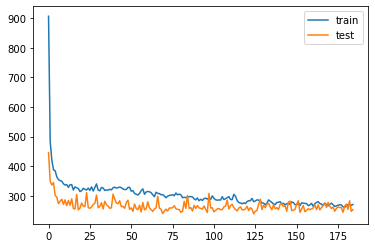

In [11]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Predicting the results of the Test set

In [12]:
y_pred = ann.predict(X_train_fs[test])
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_train[test].reshape(len(y_train[test]),1)),1))

[[ 4.94  5.6 ]
 [23.87 30.  ]
 [ 4.94  3.95]
 ...
 [ 7.41  5.6 ]
 [24.72  8.5 ]
 [71.78 92.5 ]]


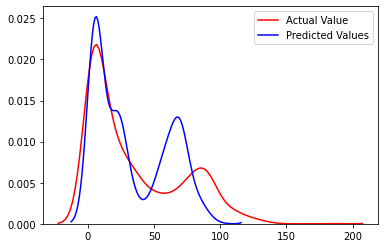

In [13]:
ax1 = sns.distplot(y_train[test], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)

Text(0, 0.5, 'Predicted Critical Temperature (K)')

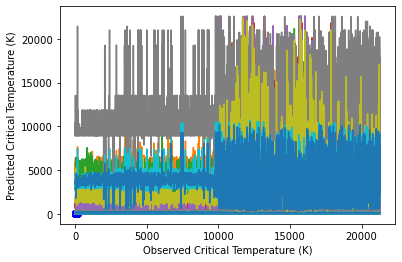

In [14]:
plt.scatter(y_train[test], y_pred, color='blue')
plt.plot(X)
plt.xlabel('Observed Critical Temperature (K)')
plt.ylabel('Predicted Critical Temperature (K)')

In [15]:
loss_train= np.sqrt(history.history['loss'])
np.mean(loss_train)

17.3553293906442

In [16]:
loss_test= np.sqrt(history.history['val_loss'])
np.mean(loss_test)

16.30651832038908